In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
# Download historical stock data for a specific ticker
ticker = 'AAPL'

stock_data = yf.download(ticker, start='2024-01-01', end='2024-12-31')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
display(stock_data)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.532089,187.315382,182.792533,186.033072,82488700
2024-01-03,183.150391,184.770668,182.335277,183.120571,58414500
2024-01-04,180.824341,181.997291,179.800489,181.062899,71983600
2024-01-05,180.098709,181.669281,179.094742,180.903888,62303300
2024-01-08,184.452560,184.492330,180.416793,181.003268,59144500
...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700


In [4]:
print("Number of open trading days in market: ", len(stock_data))

Number of open trading days in market:  251


In [5]:
stock_close_prices = stock_data['Close']

In [6]:
def evaluate_trade_period(prices, period_length):
    investments = []
    prices_values = stock_close_prices.values
    if period_length >= len(prices) or period_length <= 0:
        raise ValueError("period_length should be less than len(prices) and bigger than 0")
        
    result_list = []
    for i in range(0, len(prices_values)-period_length, 1):
        buy_price = prices_values[i][0]
        investments.append(buy_price)
        sell_price = prices_values[i+period_length][0]
        result_list.append(float(sell_price-buy_price))
        
    return np.array(result_list), np.array(investments)

In [7]:
result_list, investments = evaluate_trade_period(stock_close_prices, period_length=1)

print(f"Number of all Buy/Sell Pairs (periods): {len(result_list)}")
print(f"Sum of all Buy/Sell Pairs (periods): {sum(result_list)}")
print(f"Number of investments: {len(investments)}")
print(f"Sum of investments: {sum(investments)}")
print()

positive_results = result_list[result_list > 0]
print(f"Number of Pairs (periods) with positive result (win): {len(positive_results)}")
print(f"Sum of Pairs (periods) with positive result (win): {sum(positive_results)}")
print()

negative_results = result_list[result_list < 0]
print(f"Number of Pairs (periods) with negative result (lost): {len(negative_results)}")
print(f"Sum of Pairs (periods) with negative result (lost): {sum(negative_results)}")
print()

Number of all Buy/Sell Pairs (periods): 250
Sum of all Buy/Sell Pairs (periods): 67.39093017578125
Number of investments: 250
Sum of investments: 51546.76379394531

Number of Pairs (periods) with positive result (win): 142
Sum of Pairs (periods) with positive result (win): 298.3389587402344

Number of Pairs (periods) with negative result (lost): 107
Sum of Pairs (periods) with negative result (lost): -230.94802856445312



In [8]:
period_lengths, corresponding_results = [], []
for i in range(1, len(stock_close_prices), 1):
    result_list, investments = evaluate_trade_period(stock_close_prices, period_length=i)
    period_lengths.append(i)
    corresponding_results.append(sum(result_list))

    print(f"Length of period: {i}")
    print(f"Number of all Buy/Sell Pairs (periods): {len(result_list)}")
    print(f"Sum of all Buy/Sell Pairs (periods): {sum(result_list)}")
    print(f"Number of investments: {len(investments)}")
    print(f"Sum of investments: {sum(investments)}")
    print()
    
    positive_results = result_list[result_list > 0]
    print(f"Number of Pairs (periods) with positive result (win): {len(positive_results)}")
    print(f"Sum of Pairs (periods) with positive result (win): {sum(positive_results)}")
    print()
    
    negative_results = result_list[result_list < 0]
    print(f"Number of Pairs (periods) with negative result (lost): {len(negative_results)}")
    print(f"Sum of Pairs (periods) with negative result (lost): {sum(negative_results)}")
    print()
    print("------------------------------------------------------")

Length of period: 1
Number of all Buy/Sell Pairs (periods): 250
Sum of all Buy/Sell Pairs (periods): 67.39093017578125
Number of investments: 250
Sum of investments: 51546.76379394531

Number of Pairs (periods) with positive result (win): 142
Sum of Pairs (periods) with positive result (win): 298.3389587402344

Number of Pairs (periods) with negative result (lost): 107
Sum of Pairs (periods) with negative result (lost): -230.94802856445312

------------------------------------------------------
Length of period: 2
Number of all Buy/Sell Pairs (periods): 249
Sum of all Buy/Sell Pairs (periods): 139.54983520507812
Number of investments: 249
Sum of investments: 51291.454498291016

Number of Pairs (periods) with positive result (win): 143
Sum of Pairs (periods) with positive result (win): 459.7155456542969

Number of Pairs (periods) with negative result (lost): 106
Sum of Pairs (periods) with negative result (lost): -320.16571044921875

-----------------------------------------------------

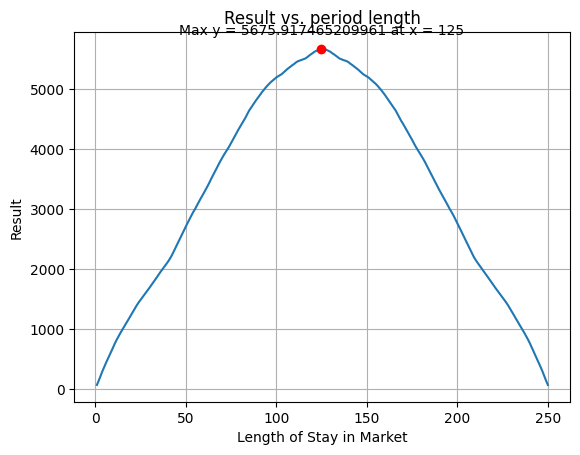

In [9]:
import matplotlib.pyplot as plt

# Creating the plot
plt.plot(period_lengths, corresponding_results)

# Adding title and labels
plt.title("Result vs. period length")
plt.xlabel("Length of Stay in Market")
plt.ylabel("Result")

# Enabling grid
plt.grid(True)

# Finding the maximum y value and its corresponding x
max_y = max(corresponding_results)
max_x = period_lengths[corresponding_results.index(max_y)]

# Plotting the maximum y value
plt.plot(max_x, max_y, 'ro')  # 'ro' stands for red circle marker

# Annotating the maximum y value and corresponding x value
plt.annotate(f'Max y = {max_y} at x = {max_x}', 
             (max_x, max_y), 
             textcoords="offset points", 
             xytext=(0, 10), 
             ha='center')

# Display the plot
plt.show()

In [10]:
result_list, investments = evaluate_trade_period(stock_close_prices, period_length=max_x)

print(f"Period length (stay in market): {max_x}")
print(f"Max Result: {max_y}")
print()

print(f"Number of all Buy/Sell Pairs (periods): {len(result_list)}")
print(f"Sum of all Buy/Sell Pairs (periods): {sum(result_list)}")
print(f"Number of investments: {len(investments)}")
print(f"Sum of investments: {sum(investments)}")
print()

positive_results = result_list[result_list > 0]
print(f"Number of Pairs (periods) with positive result (win): {len(positive_results)}")
print(f"Sum of Pairs (periods) with positive result (win): {sum(positive_results)}")
print()

negative_results = result_list[result_list < 0]
print(f"Number of Pairs (periods) with negative result (lost): {len(negative_results)}")
print(f"Sum of Pairs (periods) with negative result (lost): {sum(negative_results)}")
print()

Period length (stay in market): 125
Max Result: 5675.917465209961

Number of all Buy/Sell Pairs (periods): 126
Sum of all Buy/Sell Pairs (periods): 5675.917465209961
Number of investments: 126
Sum of investments: 23171.150756835938

Number of Pairs (periods) with positive result (win): 126
Sum of Pairs (periods) with positive result (win): 5675.917465209961

Number of Pairs (periods) with negative result (lost): 0
Sum of Pairs (periods) with negative result (lost): 0



In [11]:
total_investement = sum(investments)

share_return = round((max_y/total_investement) * 100, 2) 

print("Invested: ", total_investement)
print("Lost/Win: ", max_y)
print(f"Share Return: {share_return} %")

Invested:  23171.150756835938
Lost/Win:  5675.917465209961
Share Return: 24.5 %


In [12]:
buy_price_at_start = stock_close_prices.values[0][0]
bought_shares = total_investement/buy_price_at_start
sell_price_at_end = stock_close_prices.values[len(stock_close_prices)-1][0]
profit = (bought_shares*sell_price_at_end) - (bought_shares*buy_price_at_start)

print("One-time Investment: ", total_investement)
print("One-time Investment - Lost/Win: ", profit)
print(f"One-time Investment Share Return: {(profit/total_investement) * 100} %")

One-time Investment:  23171.150756835938
One-time Investment - Lost/Win:  8462.080547797817
One-time Investment Share Return: 36.519897680529915 %
